#### Code for introducing Voltage Dependent Theta Neuron Model into Low Rank Connectivity SNNs  


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import lowrankSNN

In [11]:
# class LowRankSNN:
#     # CONSTANTS
#     G_L_E = 0.08
#     G_L_I = 0.1
#     G_P= [0.004069, 0.02672, 0.003276, 0.02138] #g_peak:[E←E, E←I, I←E, I←I]
#     V_T = -55
#     V_R = -62
#     REV_E = 0
#     REV_I = -70
#     BIAS = V_T - V_R #Bias current
#     C0 = 2/(V_T-V_R)
#     C1 = (2*REV_E-V_R-V_T)/(V_T-V_R)
#     C2 = (2*REV_I-V_R-V_T)/(V_T-V_R)

#     def __init__(self,N_E=1000,N_I=200,RS= 1,taud_E=2,taud_I=5) -> None:
#         self.N_E = N_E
#         self.N_I = N_I
#         self.RS = RS
#         self.taud_E = taud_E
#         self.taud_I = taud_I
#         self.conn = np.zeros((N_E+N_I,N_E+N_I))
#         self.added_lowrank = False
#         self.added_random = False
        

#     def show(self):
#         print('Network Settings')
#         print('==========================================')
#         print('Number of Neurons: ', self.N_E+self.N_I)
#         print('Number of Excitatory Units: ', self.N_E)
#         print('Number of Inhibitory Units: ', self.N_I)
#         # full_w = torch.mm(self.W, self.mask) #包含兴奋和抑制性信息的连接矩阵
#         # full_w = self.W * self.mask
#         zero_w = (self.conn == 0).sum().item()
#         # pos_w = (self.conn > 0).sum().item()
#         # neg_w = (full_w < 0 ).sum().item()
#         print('Zero Weights occupy: %2.2f %%'%(zero_w/((self.N_E+self.N_I)**2)*100))
#         # print('Positive Weights occupy: %2.2f %%'%(pos_w/(self.N**2)*100))
#         # print('Negative Weights occupy: %2.2f %%'%(neg_w/(self.N**2)*100))

#     def show_conn(self, maxvalue = 0.001):
#         full_w = self.conn.copy() #包含兴奋和抑制性信息的连接矩阵
#         # let the weight from Inhibitory be negative value
#         full_w[:,self.N_E:self.N_E+self.N_I] = -full_w[:,self.N_E:self.N_E+self.N_I]
#         colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]  # 蓝 -> 白 -> 红
#         cmap_name = 'gradient_div_cmap'
#         gradient_cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=100)  # N=100 使渐变更加平滑
#         plt.imshow(full_w,cmap=gradient_cm,vmax = maxvalue,vmin = -maxvalue)
#         plt.colorbar()
#         plt.title('Connectivity Matrix')
#         plt.xlabel('From')
#         plt.xticks(np.arange(0,len(full_w)+1,500))
#         plt.ylabel('To')
#         plt.yticks(np.arange(0,len(full_w)+1,500))
#         plt.gca().xaxis.set_ticks_position('top')
#         plt.gca().xaxis.set_label_position('top')
#         plt.show()
        

#     def add_random(self,conn_rand):
#         self.conn_random = conn_rand
#         self.conn += conn_rand*self.RS
#         self.added_random = True
#         print('Random connection has been added.')
#         return

#     def remove_random(self):
#         if not self.added_random:
#             print('There is no random connection added.')
#             return
#         self.conn -= self.conn_random
#         del self.conn_random
#         self.added_random = False
#         print('Random connection has been removed.')
#         return

#     def add_lowrank(self,conn_LR, W_out):
#         self.conn_lowrank = conn_LR
#         self.conn += conn_LR
#         self.W_out = W_out
#         self.added_lowrank = True
#         print('Low Rank connection and readout vector have been added.')
#         return

#     def remove_lowrank(self):
#         if not self.added_lowrank:
#             print('There is no Low Rank Connectivity added.')
#             return
#         self.conn -= self.conn_lowrank
#         del self.conn_lowrank
#         del self.W_out
#         self.added_lowrank = False
#         print('Low Rank connection and readout vector have been removed.')

#     def V2theta(self,V):
#         V_R = LowRankSNN.V_R
#         V_T = LowRankSNN.V_T
#         return 2*np.arctan((V-(V_R+V_T)/2)*2/(V_T-V_R))

#     def theta2V(self,theta):
#         V_R = LowRankSNN.V_R
#         V_T = LowRankSNN.V_T
#         return (V_T+V_R)/2+(V_T-V_R)/2*np.tan(theta/2)

#     def simulate(self,dt,Input):

#         if self.conn_lowrank.shape == self.conn_random.shape:
#             print('Low-rank connectivity is added to all the connections')

#         G_P = LowRankSNN.G_P
#         G_L_E = LowRankSNN.G_L_E
#         G_L_I = LowRankSNN.G_L_I
#         C0 = LowRankSNN.C0
#         C1 = LowRankSNN.C1
#         C2 = LowRankSNN.C2
#         conn_EE = self.conn[:self.N_E,:self.N_E]
#         conn_IE = self.conn[self.N_E:self.N_E+self.N_I,:self.N_E]
#         conn_EI = self.conn[:self.N_E,self.N_E:self.N_E+self.N_I]
#         conn_II = self.conn[self.N_E:self.N_E+self.N_I,self.N_E:self.N_E+self.N_I]
#         V = np.zeros_like(Input)
#         phase = np.zeros_like(Input)
#         g = np.zeros_like(Input)
#         g_EE = np.delete(np.zeros_like(Input),range(self.N_I),axis=0)
#         g_IE = np.delete(np.zeros_like(Input),range(self.N_E),axis=0)
#         g_EI = np.delete(np.zeros_like(Input),range(self.N_I),axis=0)
#         g_II = np.delete(np.zeros_like(Input),range(self.N_E),axis=0)
#         spk = np.zeros_like(Input)

#         for step, inputs in enumerate(Input.T): #for every time step
#             if step == 0: continue

#             # Calculate Synaptic Conductance (Single Exponential filter)
#             g_EE[:,step] = g_EE[:,step-1] + \
#                 (-g_EE[:,step-1]/self.taud_E+ \
#                 G_P[0]*conn_EE@spk[:self.N_E,step-1])*dt
#             g_EI[:,step] = g_EI[:,step-1] + \
#                 (-g_EI[:,step-1]/self.taud_E+ \
#                 G_P[1]*conn_EI@spk[self.N_E:self.N_E+self.N_I,step-1])*dt
#             g_IE[:,step] = g_IE[:,step-1] + \
#                 (-g_IE[:,step-1]/self.taud_I+ \
#                 G_P[2]*conn_IE@spk[:self.N_E,step-1])*dt
#             g_II[:,step] = g_II[:,step-1] + \
#                 (-g_II[:,step-1]/self.taud_I+ \
#                 G_P[3]*conn_II@spk[self.N_E:self.N_E+self.N_I,step-1])*dt
#             # Calculate the comprehensive Synaptic Conductance (Single Exponential filter)
#                 # For Excitatory Neurons
#             g[:self.N_E,step] = g[0:self.N_E,step-1] + \
#                 (-g[0:self.N_E,step-1]/self.taud_E+ \
#                 G_P[0]*conn_EE@spk[:self.N_E,step-1]+ \
#                 G_P[1]*conn_EI@spk[self.N_E:self.N_E+self.N_I,step-1])*dt
#                 # For Inhibitory Neurons
#             g[self.N_E:self.N_E+self.N_I,step] = g[self.N_E:self.N_E+self.N_I,step-1] + \
#                 (-g[self.N_E:self.N_E+self.N_I,step-1]/self.taud_I+ \
#                 G_P[2]*conn_IE@spk[:self.N_E,step-1]+ \
#                 G_P[3]*conn_II@spk[self.N_E:self.N_E+self.N_I,step-1])*dt

#             if np.any(g<0):
#                 print('got it')

#             # Calculate Membrane Voltage (Phase)
#             # For Excitatory Neurons
#             phase_pre_E = phase[:self.N_E,step-1]
#             phase[:self.N_E,step] = phase_pre_E + (-G_L_E*np.cos(phase_pre_E)+C0*(1+np.cos(phase_pre_E))*inputs[:self.N_E]+g_EE[:,step]*(C1*(1+np.cos(phase_pre_E))-\
#                 np.sin(phase_pre_E))+g_EI[:,step]*(C2*(1+np.cos(phase_pre_E))-np.sin(phase_pre_E)))*dt
#             # For Inhibitory Neurons
#             phase_pre_I = phase[self.N_E:self.N_E+self.N_I,step-1]
#             phase[self.N_E:self.N_E+self.N_I,step] = phase_pre_I + (-G_L_I*np.cos(phase_pre_I)+C0*(1+np.cos(phase_pre_I))*inputs[self.N_E:self.N_E+self.N_I]+g_IE[:,step]*(C1*(1+np.cos(phase_pre_I))-\
#                 np.sin(phase_pre_I))+g_II[:,step]*(C2*(1+np.cos(phase_pre_I))-np.sin(phase_pre_I)))*dt

#             # Store the firing time
#             spk[:,step] = (phase[:,step] >= np.pi).astype(int)
#             phase[:,step][phase[:,step] >= np.pi] -= 2*np.pi
            

#         if self.conn_lowrank.shape == self.conn_random.shape:
#             Out = np.dot(g.T,self.W_out)/(self.N_E+self.N_I) #Size of g:(N,time), Size of W_out: (N,1)
#         V = self.theta2V(phase)
#         return Out, V, g, spk



In [2]:
# # Function
# def Draw_Output(ax,data,color_data,label_data,dt,input_data):
#     # tt = np.linspace(0,len(data)-1)*dt
#     tt = np.array(range(len(data)))*dt
#     ax.plot(tt,data,color = color_data, label = '$'+label_data+'$')

#     ax.set_xlabel('time (ms)')
#     ax.set_ylabel('Read Out')

#     ax.set_xlim([0, tt[-1]])
#     ax.set_ylim([0, np.max([0.00001,np.max(data),ax.get_ylim()[1]])])

#     non_zero_columns = np.any(input_data!=0, axis=0)
#     non_zero_columns = np.where(non_zero_columns)[0]
#     start_sti = non_zero_columns[0]*dt
#     end_sti = non_zero_columns[-1]*dt
#     ax.fill_between([start_sti,end_sti],-2,1,alpha = 0.1)
#     ax.legend(loc = 1, prop={'size':10})

# def Draw_Conductance(ax,data,color_data,label_data,dt,input_data):
#     tt = np.array(range(len(data[0])))*dt
#     if type(label_data) == list:
#         for i in range(len(data)):
#             ax.plot(tt,data[i],color = color_data, label = '$'+label_data+'$')
#     else:
#         ax.plot(tt,np.mean(data,axis=0),color = color_data, label = '$'+label_data+'$')

#     ax.set_xlabel('time (ms)')
#     ax.set_ylabel('Synaptic Conductance (mS/cm^2)')

#     ax.set_xlim([0, tt[-1]])
#     ax.set_ylim([0, np.max([0.000001,np.max(data),ax.get_ylim()[1]])])

#     non_zero_columns = np.any(input_data!=0, axis=0)
#     non_zero_columns = np.where(non_zero_columns)[0]
#     start_sti = non_zero_columns[0]*dt
#     end_sti = non_zero_columns[-1]*dt
#     ax.fill_between([start_sti,end_sti],-2,1,alpha = 0.1)
#     ax.legend(loc = 1, prop={'size':10})


# def Draw_RasterPlot(ax,data,title_name,dt,input_data,N_E,N_I):
#     tt = np.array(range(len(data[0])))*dt
#     #Exc
#     for row in range(data.shape[0]-N_I):
#         spike_times = np.where(data[row]==1)[0]
#         # ax.scatter(spike_times*dt, np.ones_like(spike_times) * row, marker='|',color = 'red')
#         ax.scatter(spike_times*dt, np.ones_like(spike_times) * row, color = 'red',s=5)

#     #Inh
#     for row in range(N_E,data.shape[0]):
#         spike_times = np.where(data[row]==1)[0]
#         # ax.scatter(spike_times*dt, np.ones_like(spike_times) * row, marker='|',color = 'blue')
#         ax.scatter(spike_times*dt, np.ones_like(spike_times) * row, color = 'blue',s=5)

#     ax.set_xlabel('time (ms)')
#     ax.set_ylabel('Neuron Index')

#     ax.set_xlim([0, tt[-1]])
#     ax.set_ylim([-1, N_E+N_I])

#     non_zero_columns = np.any(input_data!=0, axis=0)
#     non_zero_columns = np.where(non_zero_columns)[0]
#     start_sti = non_zero_columns[0]*dt
#     end_sti = non_zero_columns[-1]*dt
#     ax.fill_between([start_sti,end_sti],-1,N_E+N_I,alpha = 0.1)
#     # ax.legend(loc = 1, prop={'size':10})
#     ax.set_title(title_name)



# def Draw_Voltage(ax,data,color_data,label_data,dt,input_data):
#     # print(len(data) == 0)
#     if len(data) == 0: return
#     tt = np.array(range(len(data[0])))*dt
    
#     if type(label_data) == list:
#         for i in range(len(data)):
#             ax.plot(tt,data[i],color = color_data, label = '$'+label_data+'$')
#     else:
#         ax.plot(tt,data[0],color = color_data, label = '$'+label_data+'$')
#         for i in range(1,len(data)):
#             ax.plot(tt,data[i],color = color_data)

#     ax.set_xlabel('time (ms)')
#     ax.set_ylabel('Voltage (mV)')

#     ax.set_xlim([0, tt[-1]])
#     ax.set_ylim([-100, 10])

#     non_zero_columns = np.any(input_data!=0, axis=0)
#     non_zero_columns = np.where(non_zero_columns)[0]
#     start_sti = non_zero_columns[0]*dt
#     end_sti = non_zero_columns[-1]*dt
#     ax.fill_between([start_sti,end_sti],-100,100,alpha = 0.1)
#     ax.legend(loc = 1, prop={'size':10})
#     # ax.legend()


def Draw_Projection(ax,activity,direction1,direction2,title_name='Projection',color_line = '#1C63A9',xlabel = 'Activity along Direction1',ylabel = 'Activity along Direction2',ylim = [0,0.005],xlim=[0,0.0006]):
    # Calculate teh projection （using @ to calculate inner multiply）
    # activity: numpy ndarray(N,T), direction1,2: numpy ndarray(N,1)
    act_on_dir1 = activity.T@direction1 # size(T,1)
    act_on_dir2 = activity.T@direction2
    # Draw the graph
    ax.plot(act_on_dir1,act_on_dir2,color = color_line)
    ax.set_title(title_name)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)


In [13]:
a = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]])
print(a)
# print(a.T)
b = np.array([[2],[2],[2]])
print(b)
print(a.T@b)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[2]
 [2]
 [2]]
[[ 6]
 [12]
 [18]
 [24]]


In [8]:
# Initialiazation
# LRSNN = LowRankSNN(N_E=4000,N_I=1000,RS= 1,taud_E=2,taud_I=5)
# LRSNN = LowRankSNN(N_E=5000,N_I=0,RS= 1,taud_E=2,taud_I=5)
# LRSNN = lowrankSNN.LowRankSNN(N_E=400,N_I=100,RS= 1,taud_E=2,taud_I=5)
# LRSNN = lowrankSNN.LowRankSNN(N_E=500,N_I=0,RS= 1,taud_E=2,taud_I=5)
LRSNN = lowrankSNN.LowRankSNN(N_E=1000,N_I=0,RS= 1,taud_E=2,taud_I=5)


# LRSNN = LowRankSNN(N_E=400,N_I=100,RS= 0.1,taud_E=2,taud_I=5)
#low rank文献的N=5000
# Go_NoGo Task
# Prepare the Stimuli and Readout Vector
temp = np.random.rand(1,LRSNN.N_E+LRSNN.N_I) #Size (1,N_E) for Sti_go and nogo #这里我想试试把Low Rank加到整个网络上
Sti_go = temp.copy()
Sti_nogo = temp.copy()
W_out = temp.copy()
Sti_go[Sti_go>1/3] = 0
Sti_nogo[Sti_nogo<1/3] = 0
Sti_nogo[Sti_nogo>2/3] = 0
W_out[W_out<2/3] = 0

# Use Gamma Distribution to generate Stimuli and Readout Vector
# mean and std of Gamma Distribution(Deside Sti_go,Sti_nogo,W_out,conn_rand)
mu = 1
mu = 50
si = 10

theta = si**2/mu
k = mu/theta



Sti_go[Sti_go!=0] = np.random.gamma(k,theta,len(np.nonzero(Sti_go)[0])) #random.gamma(shape(a), scale(b)=1.0, size=None),这个地方的Gamma分布及其参数选取需要进一步讨论
Sti_nogo[Sti_nogo!=0] = np.random.gamma(k,theta,len(np.nonzero(Sti_nogo)[0]))
W_out[W_out!=0] = np.random.gamma(k,theta,len(np.nonzero(W_out)[0]))
W_out = np.transpose(W_out) #Size (N_E,1)
# Low Rank Connectivity (Rank = 1)
conn_LR = W_out*Sti_go/(LRSNN.N_E+LRSNN.N_I) # 为什么除以神经元总数?
# Random Connectivity
conn_rand = np.random.gamma(k,theta,(LRSNN.N_E+LRSNN.N_I,LRSNN.N_E+LRSNN.N_I)) #这里的Gamma分布取值也需要讨论

# # Use Folded Gaussian Distribution to generate Stimuli and Readout Vector
# std_Sti = 2. #Standerd Deviration of Stimuli
# std_Wout = 2. #Standerd Deviration of readout matrix
# Sti_go[Sti_go!=0] = np.abs(np.random.normal(0,std_Sti,len(np.nonzero(Sti_go)[0]))) 
# Sti_nogo[Sti_nogo!=0] = np.abs(np.random.normal(0,std_Sti,len(np.nonzero(Sti_nogo)[0])))
# W_out[W_out!=0] = np.abs(np.random.normal(0,std_Wout,len(np.nonzero(W_out)[0])))
# W_out = np.transpose(W_out) #Size (N,1)

# conn_LR = W_out*Sti_go/(LRSNN.N_E+LRSNN.N_I) # 为什么除以神经元总数? # Low Rank Connectivity (Rank = 1)
# conn_rand = np.abs(np.random.normal(0,1/(LRSNN.N_E+LRSNN.N_I),(LRSNN.N_E+LRSNN.N_I,LRSNN.N_E+LRSNN.N_I))) # Random Connectivity

m = W_out #m = Wout
n = Sti_go #n = Stigo

# Assemble the Network
LRSNN.add_lowrank(conn_LR, W_out)
LRSNN.add_random(conn_rand)


Low Rank connection and readout vector have been added.
Random connection has been added.


(0.0, 5.0)

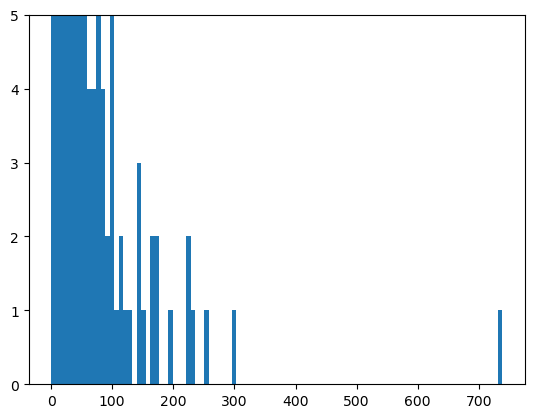

In [27]:
data = np.random.gamma(k,theta,10000)
plt.hist(data,bins=100)
# plt.xlim(0,10)
plt.ylim(0,5)

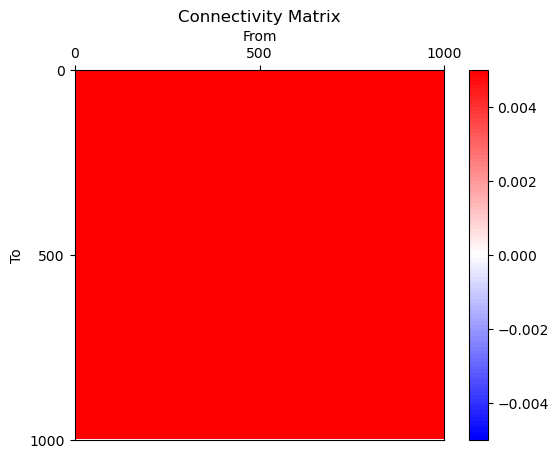

In [9]:
# Show the Network information before simulaiton
LRSNN.show_conn(maxvalue=0.005)

In [12]:
dt = 0.01 #(ms/step)
T_pre = 5 # length of time before sti (ms)
T_sti = 10 # length of time for sti (ms)
T_after = 15 # length of time after sti (ms)
T = T_pre+T_sti+T_after # length of Period time (ms): 30ms
IS = 3 #Input Strength
IS = 1 #Input Strength
Input_go = np.zeros((LRSNN.N_E+LRSNN.N_I,int(T/dt))) #size:(N,time)
Input_go[:,int(T_pre/dt):int((T_pre+T_sti)/dt)] = IS*Sti_go.T
Input_nogo = np.zeros((LRSNN.N_E+LRSNN.N_I,int(T/dt)))
Input_nogo[:,int(T_pre/dt):int((T_pre+T_sti)/dt)] = IS*Sti_nogo.T

# Simulation
Out_go, V_go, g_go, spk_go = LRSNN.simulate(dt,Input_go)
Out_nogo, V_nogo, g_nogo, spk_nogo = LRSNN.simulate(dt,Input_nogo)

prop = max(Out_go)/max(Out_nogo)
print('Performance: ', prop[0])

Low-rank connectivity is added to all the connections
Low-rank connectivity is added to all the connections
Performance:  1.0132948946690747


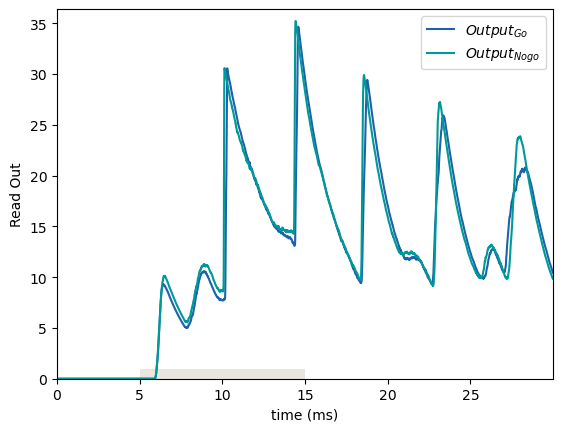

In [11]:
# Draw the results
color_Go = '#1C63A9'
color_Nogo = '#009999'
# Draw Output
fig, ax = plt.subplots()
lowrankSNN.Draw_Output(ax,Out_go,'Output_{Go}',dt,Input_go,color_data = color_Go)
lowrankSNN.Draw_Output(ax,Out_nogo,'Output_{Nogo}',dt,Input_nogo,color_data=color_Nogo)

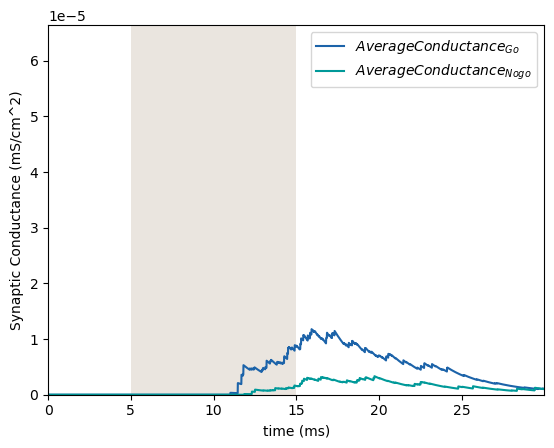

In [7]:
# Monitor the Average Conductance
fig, ax = plt.subplots()
lowrankSNN.Draw_Conductance(ax,g_go,color_Go,"Average Conductance_{Go}",dt,Input_go)
lowrankSNN.Draw_Conductance(ax,g_nogo,color_Nogo,"Average Conductance_{Nogo}",dt,Input_nogo)

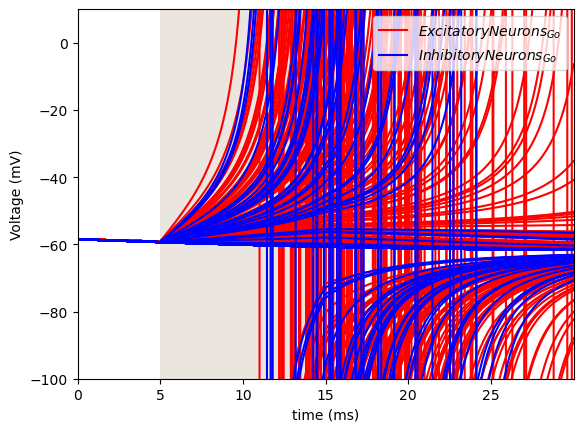

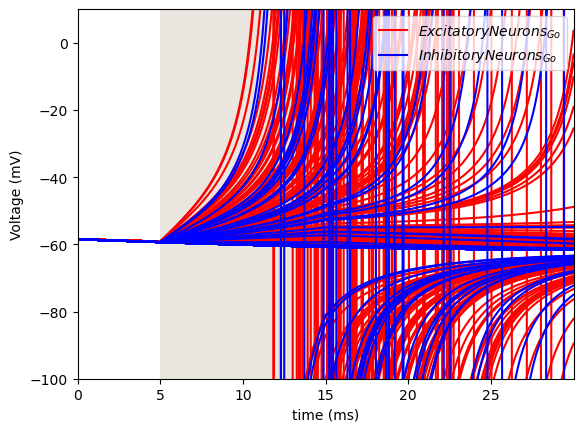

In [8]:
# Monitor the Voltage
fig, ax = plt.subplots()
lowrankSNN.Draw_Voltage(ax,V_go[0:LRSNN.N_E,:],'red','Excitatory Neurons_{Go}',dt,Input_go)
lowrankSNN.Draw_Voltage(ax,V_go[LRSNN.N_E:,:],'blue','Inhibitory Neurons_{Go}',dt,Input_go)
fig, ax = plt.subplots()
lowrankSNN.Draw_Voltage(ax,V_nogo[0:LRSNN.N_E,:],'red','Excitatory Neurons_{Go}',dt,Input_nogo)
lowrankSNN.Draw_Voltage(ax,V_nogo[LRSNN.N_E:,:],'blue','Inhibitory Neurons_{Go}',dt,Input_nogo)


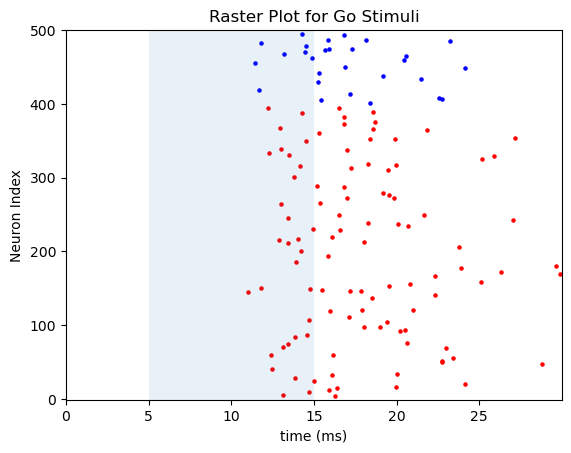

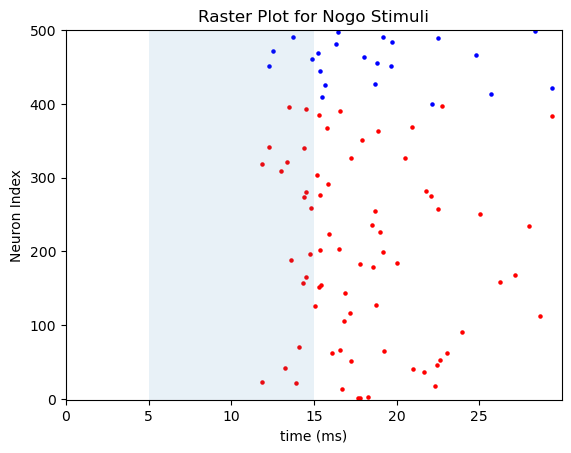

In [9]:
# Raster Plot
fig, ax = plt.subplots()
lowrankSNN.Draw_RasterPlot(ax,spk_go,'Raster Plot for Go Stimuli',dt,Input_go,LRSNN.N_E,LRSNN.N_I)
fig, ax = plt.subplots()
lowrankSNN.Draw_RasterPlot(ax,spk_nogo,'Raster Plot for Nogo Stimuli',dt,Input_nogo,LRSNN.N_E,LRSNN.N_I)

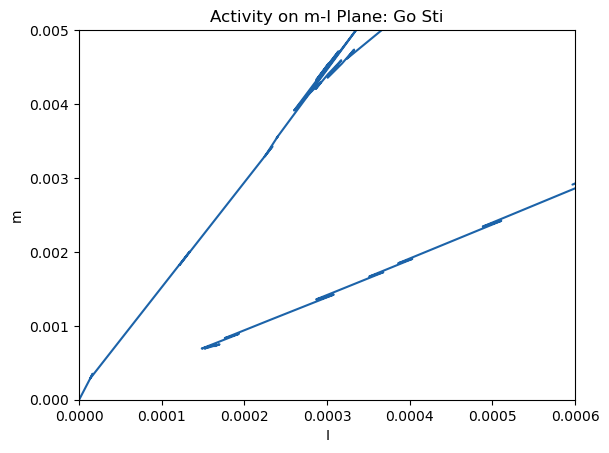

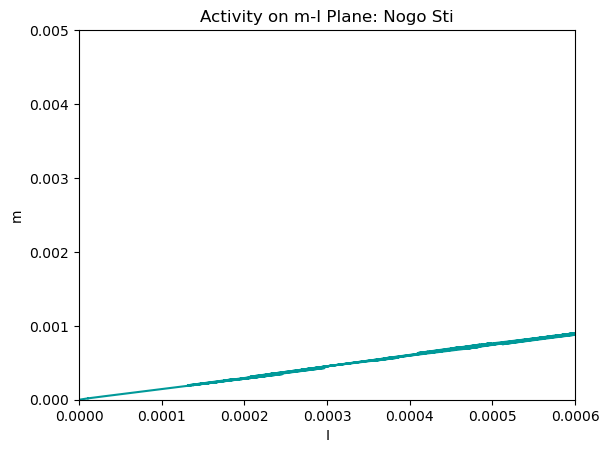

In [10]:
# Monitor the Projection on m-I plane
fig, ax = plt.subplots()
Draw_Projection(ax,g_go,Sti_go.T,m,'Activity on m-I Plane: Go Sti',color_Go,xlabel='I',ylabel='m')
fig, ax = plt.subplots()
Draw_Projection(ax,g_nogo,Sti_nogo.T,m,'Activity on m-I Plane: Nogo Sti',color_Nogo,xlabel='I',ylabel='m')


In [51]:
# # 改变来自抑制性神经元的所有连接
# # conn_EI = LRSNN.conn[:LRSNN.N_E,LRSNN.N_E:]
# # conn_II = LRSNN.conn[LRSNN.N_E:,LRSNN.N_E:]
# conn_I = LRSNN.conn[:,LRSNN.N_E:].copy()
# conn_IE = LRSNN.conn[LRSNN.N_E:,:LRSNN.N_E].copy()
# conn_EE = LRSNN.conn[:LRSNN.N_E,:LRSNN.N_E].copy()
# # LRSNN.conn[:,LRSNN.N_E:] = conn_I.copy()*0
# # LRSNN.conn[LRSNN.N_E:,:LRSNN.N_E] = conn_IE.copy()*0
# # LRSNN.conn[:LRSNN.N_E,:LRSNN.N_E] = conn_EE.copy()*0


# Out_go, V_go, g_go, spk_go = LRSNN.simulate(dt,Input_go)
# Out_nogo, V_nogo, g_nogo, spk_nogo = LRSNN.simulate(dt,Input_nogo)
# prop = max(Out_go)/max(Out_nogo)

# LRSNN.conn[:,LRSNN.N_E:] = conn_I.copy()
# LRSNN.conn[LRSNN.N_E:,:LRSNN.N_E] = conn_IE.copy()
# LRSNN.conn[:LRSNN.N_E,:LRSNN.N_E] = conn_EE.copy()
# print('Performance: ', prop)

In [52]:
# # Draw Output
# fig, ax = plt.subplots()
# Draw_Output(ax,Out_go,color_Go,'Output_{Go}',dt,Input_go)
# Draw_Output(ax,Out_nogo,color_Nogo,'Output_{Nogo}',dt,Input_nogo)
# # Raster Plot
# fig, ax = plt.subplots()
# Draw_RasterPlot(ax,spk_go,'Raster Plot for Go Stimuli',dt,Input_go,LRSNN.N_E,LRSNN.N_I)
# fig, ax = plt.subplots()
# Draw_RasterPlot(ax,spk_nogo,'Raster Plot for Nogo Stimuli',dt,Input_nogo,LRSNN.N_E,LRSNN.N_I)

In [53]:
# 0: 6.260
# 0.5: 6.172
# 0.7: 6.290
# 1: 5.989
# 1.3: 6.199
# 1.5: 6.086
# 2.0: 5.926
# 10: 6.260


25.0 2.0
Low Rank connection and readout vector have been added.
Random connection has been added.
Low-rank connectivity is added to all the connections
Low-rank connectivity is added to all the connections
Performance:  78.62386093336636


78.62386093336636

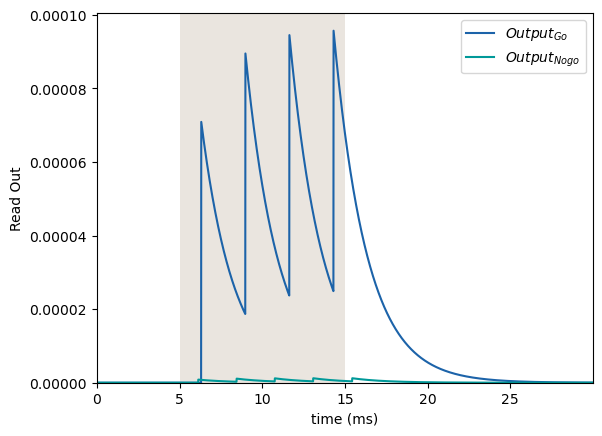

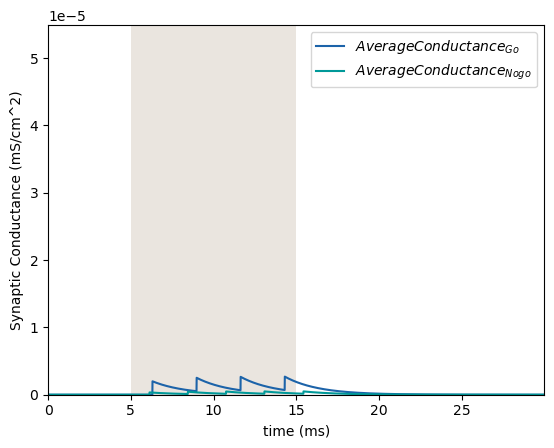

In [18]:

def test(mu,RandomS,sigma):
    # Initialiazation
    # LRSNN = lowrankSNN.LowRankSNN(N_E=5000,N_I=0,RS=RandomS,taud_E=2,taud_I=5)
    LRSNN = lowrankSNN.LowRankSNN(N_E=50,N_I=0,RS=RandomS,taud_E=2,taud_I=5)
    IS = 3 #Input strength
    #low rank文献的N=5000
    # Go_NoGo Task
    # Prepare the Stimuli and Readout Vector
    temp = np.random.rand(1,LRSNN.N_E+LRSNN.N_I) #Size (1,N_E) for Sti_go and nogo #这里我想试试把Low Rank加到整个网络上
    Sti_go = temp.copy()
    Sti_nogo = temp.copy()
    W_out = temp.copy()
    Sti_go[Sti_go>1/30] = 0
    Sti_nogo[Sti_nogo<14/30] = 0
    Sti_nogo[Sti_nogo>15/30] = 0
    W_out[W_out<29/30] = 0

    # Use Gamma Distribution to generate Stimuli and Readout Vector
    # mean and std of Gamma Distribution(Deside Sti_go,Sti_nogo,W_out,conn_rand)
    # mu = 1
    si = sigma
    b = si**2/mu
    a = mu/b
    print(a,b)

    Sti_go[Sti_go!=0] = np.random.gamma(a,b,len(np.nonzero(Sti_go)[0])) #random.gamma(shape(a), scale(b)=1.0, size=None),这个地方的Gamma分布及其参数选取需要进一步讨论
    Sti_nogo[Sti_nogo!=0] = np.random.gamma(a,b,len(np.nonzero(Sti_nogo)[0]))
    W_out[W_out!=0] = np.random.gamma(a,b,len(np.nonzero(W_out)[0]))
    W_out = np.transpose(W_out) #Size (N_E,1)
    # Low Rank Connectivity (Rank = 1)
    conn_LR = W_out*Sti_go/(LRSNN.N_E+LRSNN.N_I) # 为什么除以神经元总数?
    # Random Connectivity
    # conn_rand = np.random.gamma(a,b,(LRSNN.N_E+LRSNN.N_I,LRSNN.N_E+LRSNN.N_I)) #这里的Gamma分布取值也需要讨论
    conn_rand = np.abs(np.random.normal(0,1/(LRSNN.N_E+LRSNN.N_I),(LRSNN.N_E+LRSNN.N_I,LRSNN.N_E+LRSNN.N_I))) #改回和原来一样的形式

    m = W_out #m = Wout
    n = Sti_go #n = Stigo

    # Assemble the Network
    LRSNN.add_lowrank(conn_LR, W_out)
    LRSNN.add_random(conn_rand)
    LRSNN.conn[LRSNN.conn >= 1] = 1
    # Show the Network information before simulaiton
    # LRSNN.show_conn()
    dt = 0.01 #(ms/step)
    T_pre = 5 # length of time before sti (ms)
    T_sti = 10 # length of time for sti (ms)
    T_after = 15 # length of time after sti (ms)
    T = T_pre+T_sti+T_after # length of Period time (ms): 30ms

    Input_go = np.zeros((LRSNN.N_E+LRSNN.N_I,int(T/dt))) #size:(N,time)
    Input_go[:,int(T_pre/dt):int((T_pre+T_sti)/dt)] = Sti_go.T
    Input_nogo = np.zeros((LRSNN.N_E+LRSNN.N_I,int(T/dt)))
    Input_nogo[:,int(T_pre/dt):int((T_pre+T_sti)/dt)] = Sti_nogo.T

    # Simulation
    Out_go, V_go, g_go, spk_go = LRSNN.simulate(dt,Input_go*IS)
    Out_go = np.dot(np.tanh(g_go.T),W_out)/(LRSNN.N_E+LRSNN.N_I)
    Out_nogo, V_nogo, g_nogo, spk_nogo = LRSNN.simulate(dt,Input_nogo*IS)
    Out_nogo = np.dot(np.tanh(g_nogo.T),W_out)/(LRSNN.N_E+LRSNN.N_I)

    prop = max(Out_go)/max(Out_nogo)
    print('Performance: ', prop[0])

    # Color data
    color_Go = '#1C63A9'
    color_Nogo = '#009999'
    fig,ax = plt.subplots()
    lowrankSNN.Draw_Output(ax,Out_go,'Output_{Go}',dt,Input_go*IS,color_data = color_Go)
    lowrankSNN.Draw_Output(ax,Out_nogo,'Output_{Nogo}',dt,Input_nogo*IS,color_data=color_Nogo)
    # Monitor the Average Conductance
    fig, ax = plt.subplots()
    lowrankSNN.Draw_Conductance(ax,g_go,color_Go,"Average Conductance_{Go}",dt,Input_go)
    lowrankSNN.Draw_Conductance(ax,g_nogo,color_Nogo,"Average Conductance_{Nogo}",dt,Input_nogo)
    return prop[0]


test(50,0.5,10)